In [1]:
import scipy.linalg
import numpy as np
import matplotlib.pyplot as plt
import time

n = 50
time = 0.0271451473236084


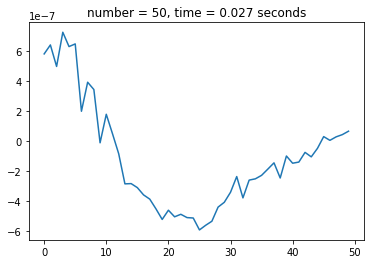

n = 100
time = 0.10285210609436035


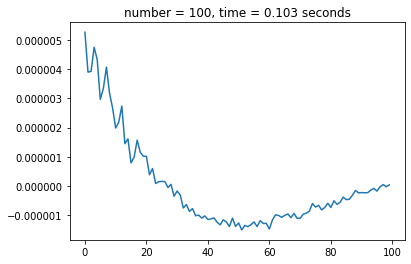

n = 150
time = 0.1653892993927002


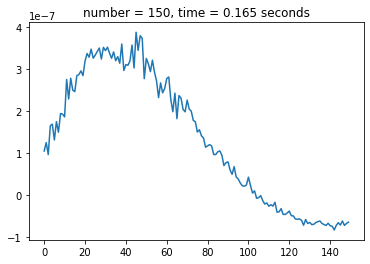

n = 200
time = 0.2734558582305908


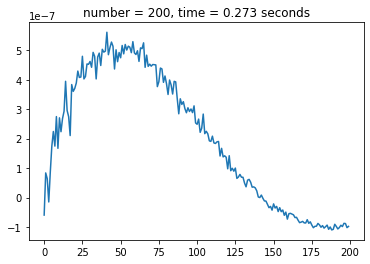

n = 250
time = 0.3658289909362793


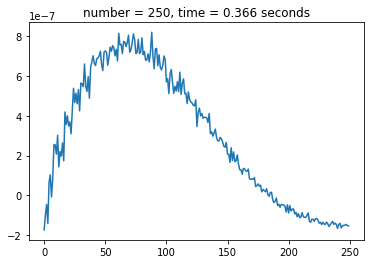

n = 300
time = 0.5015230178833008


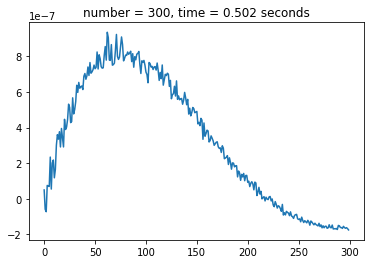

n = 350
time = 0.7035861015319824


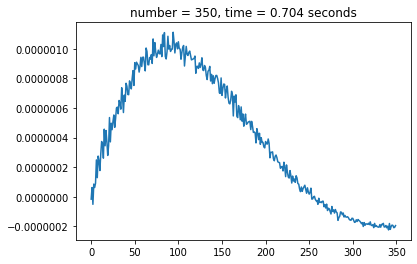

n = 400
time = 0.9499936103820801


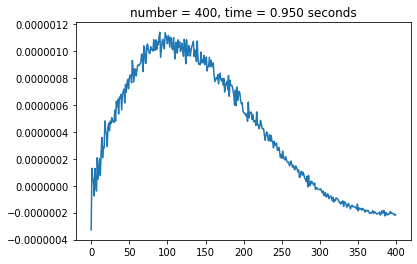

n = 450
time = 1.3867738246917725


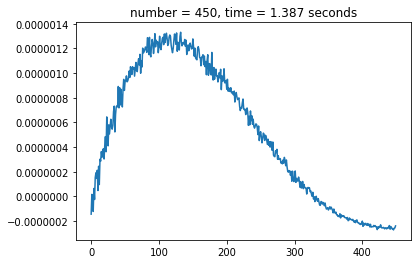

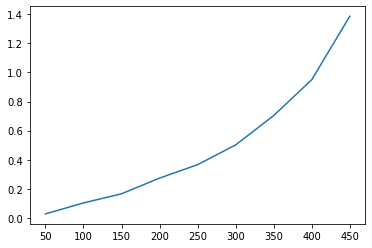

In [2]:
eps = 0.000001
def dif(x, xnew):
    s = 0
    for i in range(n):
        s += xnew[i] - x[i]
    s *= s
    return s
    
def zeidel(A, f, x):
    xnw = [0] * n
    for i in range(n):
        s = 0
        for j in range(i):
            s = s + A[i][j] * xnw[j]
        for j in range(i + 1, n):
            s = s + A[i][j] * x[j]            
        xnw[i] = (f[i] - s) / A[i][i]
    return xnw

def solve(A, f):
    xnew = np.random.uniform(0, n, n)
    while True:
        x = xnew
        xnew = zeidel(A, f, x)
        if dif(x, xnew) < eps:
            break
    return xnew

qTime = 0.0
n = 0
nList = []
qTimeList = []
while qTime <= 1.0:
    n += 50
    nList.append(n)
    A = np.random.uniform(0, n, (n, n))
    for i in range(n):
        A[i][i] = A[i][i] + n * n;
    f = np.random.uniform(0, n, n)
    Y1 = np.linalg.solve(A, f)
    startTime = time.time()
    Y2 = solve(A, f)
    qTime = time.time() - startTime
    qTimeList.append(qTime)
    print(f"n = {n}")
    print(f"time = {qTime}")
    fig, ax = plt.subplots()
    ax.plot(Y2-Y1)
    plt.title(f"number = {n}, time = {qTime:0.3f} seconds")
    plt.show()
    if n % 100 == 0:
        fig.savefig(f"Zeidel_graphics/{n}x{n}.png")
fig, ax = plt.subplots()
ax.plot(nList, qTimeList)
plt.show()
fig.savefig("Zeidel_time_dependes_of_quantity.png")